In [1]:
import pickle

import numpy as np
import seaborn as sns
import pandas as pd
from pylab import rcParams

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

parsed_logs_folder = 'Enron/parsing/'
social_graph = pickle.load(open(parsed_logs_folder + "social.pkl", "rb"))
recipientsPerEmail = pickle.load(open(parsed_logs_folder + "recipients.pkl", "rb"))

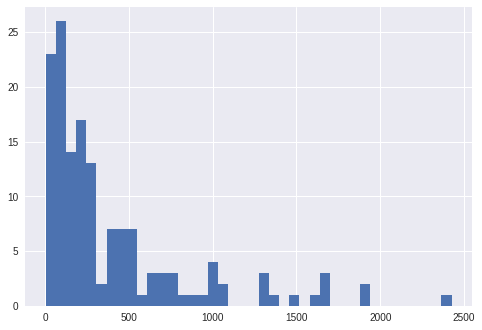

In [2]:
data = [info["num_of_friends"] for info in social_graph.values()]
plt.hist(data, bins=40)
plt.show()

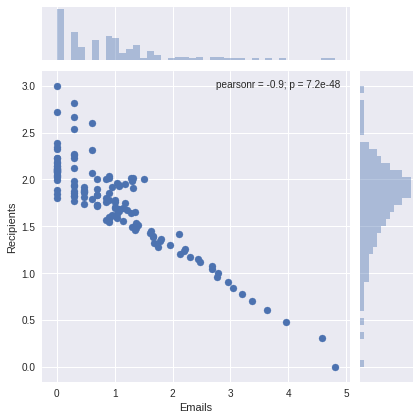

In [3]:
x, y = zip(*sorted(recipientsPerEmail.items(), key=lambda t: t[0]))
data = pd.DataFrame(dict(
    x=list(recipientsPerEmail.values()),
    y=list(recipientsPerEmail.keys())))
data['Emails'] = np.log10(data['x'])
data['Recipients'] = np.log10(data['y'])

sns.jointplot('Emails', 'Recipients', data=data, kind='scatter', marginal_kws=dict(bins=40))
plt.show()